## Import necessary libraries

In [84]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.linear_model import LogisticRegression  

from sklearn.metrics import classification_report
import nltk
from nltk.corpus import stopwords
from collections import Counter

## Read the dataset

In [52]:
df = pd.read_csv('spam.csv', encoding = 'ISO-8859-1')

In [53]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [55]:
df['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [56]:
df['v2'].unique()

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [57]:
df['Unnamed: 2'].unique()

array([nan, ' PO Box 5249',
       ' the person is definitely special for u..... But if the person is so special',
       ' HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE JEN XXX\\""',
       ' wanted to say hi. HI!!!\\" Stop? Send STOP to 62468"',
       'this wont even start........ Datz confidence.."', 'GN',
       '.;-):-D"',
       'just been in bedbut mite go 2 thepub l8tr if uwana mt up?loads a luv Jenxxx.\\""',
       ' bt not his girlfrnd... G o o d n i g h t . . .@"',
       ' I\'ll come up"',
       ' don\'t miss ur best life for anything... Gud nyt..."',
       ' just as a shop has to give a guarantee on what they sell. B. G."',
       ' But at d end my love compromised me for everything:-(\\".. Gud mornin:-)"',
       ' the toughest is acting Happy with all unspoken pain inside..\\""',
       ' smoke hella weed\\""', '\\" not \\"what i need to do.\\""',
       'JUST GOT PAYED2DAY & I HAVBEEN GIVEN Aå£50 PAY RISE 4MY WORK & HAVEBEEN MADE PRESCHOOLCO-ORDINATOR 2I AM FEELINGOOD

In [58]:
df['Unnamed: 3'].unique()

array([nan, ' MK17 92H. 450Ppw 16"', ' why to miss them', 'GE',
       'U NO THECD ISV.IMPORTANT TOME 4 2MORO\\""',
       'i wil tolerat.bcs ur my someone..... But',
       ' ILLSPEAK 2 U2MORO WEN IM NOT ASLEEP...\\""',
       'whoever is the KING\\"!... Gud nyt"', ' TX 4 FONIN HON',
       ' \\"OH No! COMPETITION\\". Who knew', 'IåÕL CALL U\\""'],
      dtype=object)

In [59]:
df['Unnamed: 4'].unique()

array([nan, ' just Keep-in-touch\\" gdeve.."', 'GNT:-)"',
       ' Never comfort me with a lie\\" gud ni8 and sweet dreams"',
       ' CALL 2MWEN IM BK FRMCLOUD 9! J X\\""',
       ' one day these two will become FREINDS FOREVER!"'], dtype=object)

In [60]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 403


In [61]:
# Missing Values/Null Values Count
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

# Insights
* The Spam dataset consists of different messages and the category of the message along with.
* There are 5572 rows and 5 columns provided in the data.
* 403 duplicate rows are present in the dataset.
* No Null values exist in v1 & v2 column, but lots of null values present in unnamed 2,3,4 columns (will drop those 3 columns later).

In [62]:
df.loc[df["v1"] == "spam", "Category"] = 0
df.loc[df["v1"] == "ham", "Category"] = 1

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Category
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,1.0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,1.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,0.0
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,1.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,1.0


In [63]:
df.drop_duplicates()
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Category
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,1.0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,1.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,0.0
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,1.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,1.0
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,0.0
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,1.0
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,1.0
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,1.0


In [68]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)
df

,v1,v2,Category
0,ham,go jurong point crazi avail bugi n great world...,1.0
1,ham,ok lar joke wif u oni,1.0
2,spam,free entri wkli comp win fa cup final tkt st m...,0.0
3,ham,u dun say earli hor u c alreadi say,1.0
4,ham,nah think goe usf live around though,1.0
...,...,...,...
5567,spam,nd time tri contact u u pound prize claim easi...,0.0
5568,ham,b go esplanad fr home,1.0
5569,ham,piti mood suggest,1.0
5570,ham,guy bitch act like interest buy someth els nex...,1.0


In [73]:
df.rename(columns = {'v1': 'Category_name', 'v2': 'Message'}, inplace = True)
df.head()

,Category_name,Message,Category
0,ham,go jurong point crazi avail bugi n great world...,1.0
1,ham,ok lar joke wif u oni,1.0
2,spam,free entri wkli comp win fa cup final tkt st m...,0.0
3,ham,u dun say earli hor u c alreadi say,1.0
4,ham,nah think goe usf live around though,1.0


In [74]:
df["Category_name"].value_counts()

Category_name
ham     4825
spam     747
Name: count, dtype: int64

# Stopword Removal

In [76]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

nltk.download('stopwords')

# Initialise the stemmer
stw = PorterStemmer()

# Define a function for text processing
def text_preproccesing(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    text = [stw.stem(word) for word in text if word not in stopwords.words('english')]
    return ' '.join(text)

#Apply the function to the message column
df['Message'] = df['Message'].apply(text_preproccesing)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Category_name,Message,Category
0,ham,go jurong point crazi avail bugi n great world...,1.0
1,ham,ok lar joke wif u oni,1.0
2,spam,free entri wkli comp win fa cup final tkt st m...,0.0
3,ham,u dun say earli hor u c alreadi say,1.0
4,ham,nah think goe usf live around though,1.0


## Word cloud for Different Categories(ham/spam)

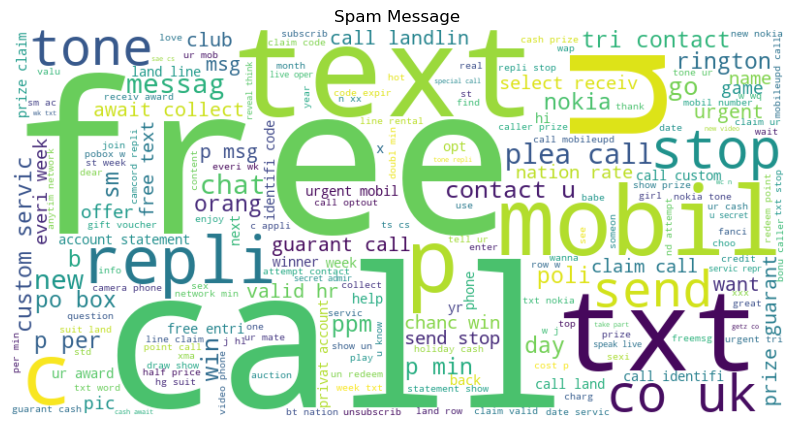

In [77]:
spam_df = df[df['Category'] == 0]
spam_text = ' '.join(spam_df['Message'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Spam Message')
plt.show()

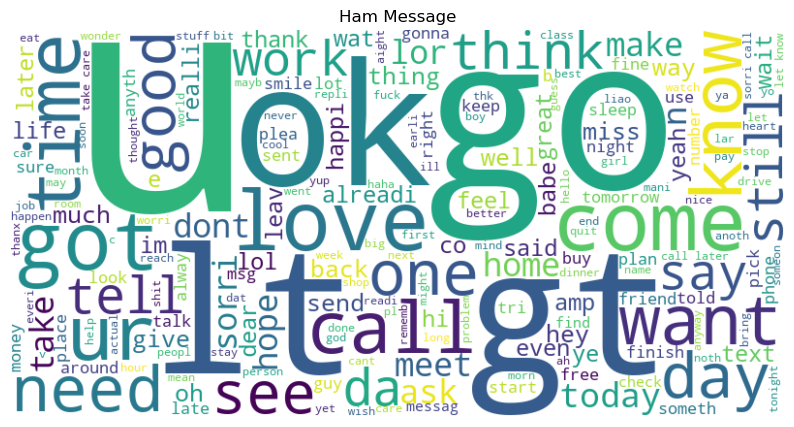

In [78]:
spam_df = df[df['Category'] == 1]
spam_text = ' '.join(spam_df['Message'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Ham Message')
plt.show()

# Insights from above wordcloud
Spam messages consists of words like: 
* call
* free
* text
* win
* prize
* guarantee call etc.
    
Ham messages contains:
* okay
* call
* come
* need
* meet
* go etc.

# Train/ Test Split

In [79]:
# Train test split
X = df['Message']
y = df['Category']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# TF-IDF

In [102]:
# Feature Extraction -TF-IDF

#Create a TF-IDF vectorizer to convert text messages into numerical feature
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english',lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Model Training

In [125]:
model = LogisticRegression()
model.fit(X_train_features,y_train)

LogisticRegression()

In [126]:
# Model evaluation
prediction_on_training_data_lr = model.predict(X_train_features)
accuracy_on_training_data_lr = accuracy_score(y_train, prediction_on_training_data_lr)

prediction_on_test_data_lr = model.predict(X_test_features)
accuracy_on_test_data_lr = accuracy_score(y_test, prediction_on_test_data_lr)

# Print accuracy
print('Accuracy on training data_lr: {} %'.format(accuracy_on_training_data_lr * 100))
print('Accuracy on test data_lr: {} %'.format(accuracy_on_test_data_lr * 100))

Accuracy on training data_lr: 97.24029616333857 %
Accuracy on test data_lr: 95.60538116591928 %


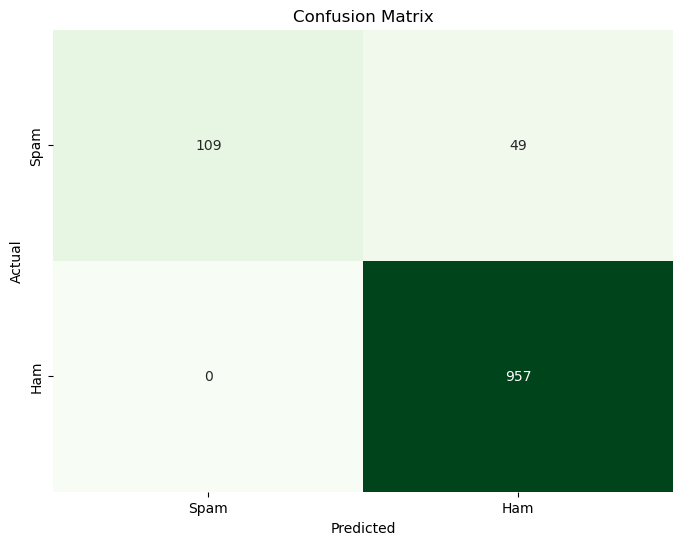

In [127]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, prediction_on_test_data_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [129]:
clf = LinearSVC()
clf.fit(X_train_features,y_train)

LinearSVC()

In [130]:
# Model evaluation
prediction_on_training_data_lsvc = clf.predict(X_train_features)
accuracy_on_training_data_lsvc = accuracy_score(y_train, prediction_on_training_data_lsvc)

prediction_on_test_data_lsvc = clf.predict(X_test_features)
accuracy_on_test_data_lsvc = accuracy_score(y_test, prediction_on_test_data_lsvc)

# Print accuracy
print('Accuracy on training data_lsvc: {} %'.format(accuracy_on_training_data_lsvc * 100))
print('Accuracy on test data_lsvc: {} %'.format(accuracy_on_test_data_lsvc * 100))

Accuracy on training data_lsvc: 99.91025353376712 %
Accuracy on test data_lsvc: 98.11659192825111 %


In [131]:
y_pred = clf.predict(X_test_features)
print("accuracy Score: ", accuracy_score(y_test, y_pred))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print()
print("precision score: ", precision_score(y_test, y_pred))

accuracy Score:  0.9811659192825112

confusion matrix: 
[[140  18]
 [  3 954]]

precision score:  0.9814814814814815


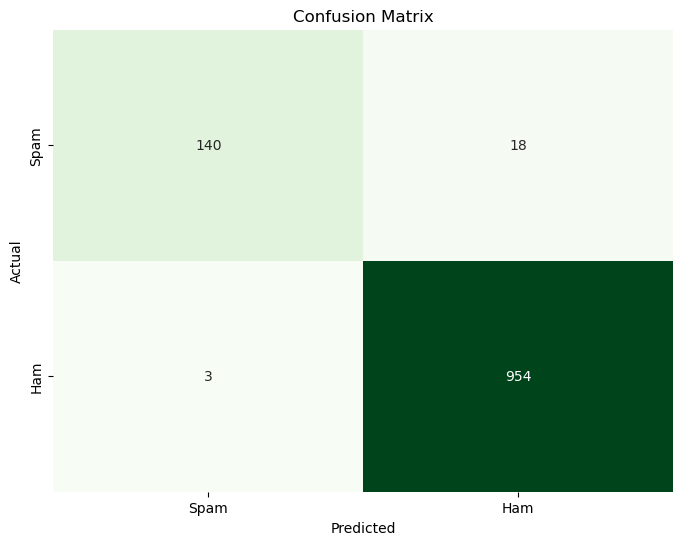

In [132]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, prediction_on_test_data_lsvc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [133]:
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
rfc.fit(X_train_features,y_train)

RandomForestClassifier(n_estimators=50, random_state=2)

In [134]:
# Model evaluation
prediction_on_training_data_rfc = rfc.predict(X_train_features)
accuracy_on_training_data_rfc = accuracy_score(y_train, prediction_on_training_data_rfc)

prediction_on_test_data_rfc = rfc.predict(X_test_features)
accuracy_on_test_data_rfc = accuracy_score(y_test, prediction_on_test_data_rfc)

# Print accuracy
print('Accuracy on training data_rfc: {} %'.format(accuracy_on_training_data_rfc * 100))
print('Accuracy on test data_rfc: {} %'.format(accuracy_on_test_data_rfc * 100))

Accuracy on training data_rfc: 99.97756338344178 %
Accuracy on test data_rfc: 96.8609865470852 %


In [135]:
y_pred = rfc.predict(X_test_features)
print("accuracy Score: ", accuracy_score(y_test, y_pred))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print()
print("precision score: ", precision_score(y_test, y_pred))

accuracy Score:  0.968609865470852

confusion matrix: 
[[123  35]
 [  0 957]]

precision score:  0.9647177419354839


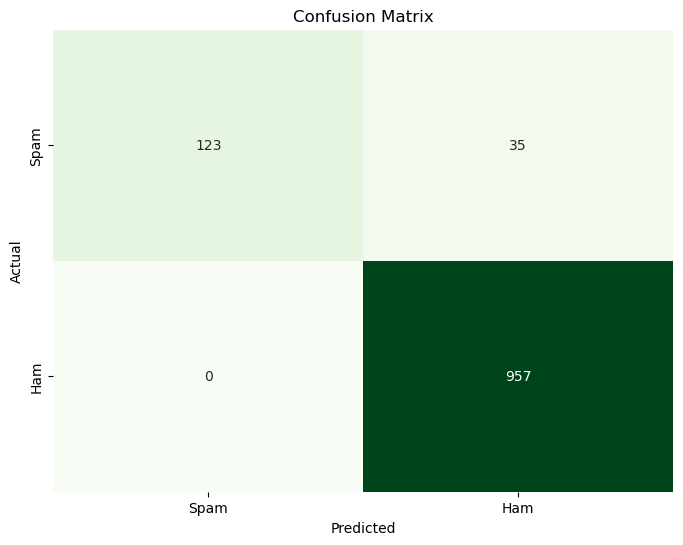

In [136]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, prediction_on_test_data_rfc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [137]:
xgb = XGBClassifier(n_estimators=50,random_state=2)
xgb.fit(X_train_features,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)

In [138]:
# Model evaluation
prediction_on_training_data_xgb = xgb.predict(X_train_features)
accuracy_on_training_data_xgb = accuracy_score(y_train, prediction_on_training_data_xgb)

prediction_on_test_data_xgb = rfc.predict(X_test_features)
accuracy_on_test_data_xgb = accuracy_score(y_test, prediction_on_test_data_xgb)

# Print accuracy
print('Accuracy on training data_xgb: {} %'.format(accuracy_on_training_data_xgb * 100))
print('Accuracy on test data_xgb: {} %'.format(accuracy_on_test_data_xgb * 100))

Accuracy on training data_xgb: 98.90060578864707 %
Accuracy on test data_xgb: 96.8609865470852 %


In [139]:
y_pred = xgb.predict(X_test_features)
print("accuracy Score: ", accuracy_score(y_test, y_pred))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print()
print("precision score: ", precision_score(y_test, y_pred))

accuracy Score:  0.968609865470852

confusion matrix: 
[[124  34]
 [  1 956]]

precision score:  0.9656565656565657


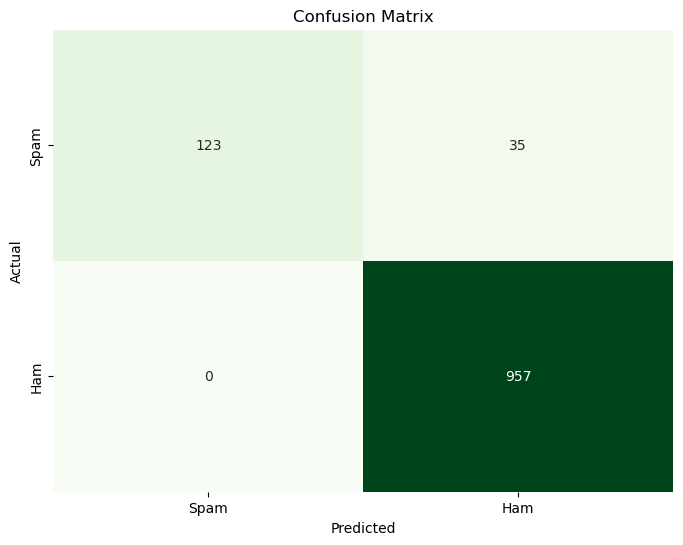

In [140]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, prediction_on_test_data_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### After evaluating various classifier models, including LogisticRegression, LinearSVC, Random Forest Classifier, and XGBClassifier, for detecting spam SMS.

### I am going to proceed with testing using the Linear Support Vector Machine (LinearSVM) on our existing data as it has accuracy of 98% and it is also predicting less number of false positives(i.e mails which are actually spam but predicted as ham)

# Test the model with new input

In [157]:
input_your_mail ="Dear Apoorva I hope you doing good"
input_data_features = feature_extraction.transform([input_your_mail])
prediction = model.predict(input_data_features)
if prediction[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Ham Mail


In [158]:
input_your_mail ="Congratulations! You've won a luxury vacation package worth $10,000! Click here to claim your prize now!"
input_data_features = feature_extraction.transform([input_your_mail])
prediction = model.predict(input_data_features)
if prediction[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Spam Mail


# Hence we can say that our LinearSVC model (accuracy 98%) is predicting ham and spam emails accurately.